In [1]:
# PCA + t-SNE visualization for mnist_test_nolabels.csv
# Run in Colab or locally. If using Colab, upload the ZIP to /content or point csv_path accordingly.

import zipfile, os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
df_raw = pd.read_csv('mnist_test_nolabels.csv')

#fill NaN by column mean
df_num = df_raw.apply(pd.to_numeric, errors='coerce')
df_clean = df_num.fillna(df_num.mean(axis=0)).fillna(0)

#convert to f32
X = df_clean.values.astype(np.float32)
print("Data shape:", X.shape, "dtype:", X.dtype)

#mean 0
X_centered = X - X.mean(axis=0, keepdims=True)


Data shape: (10000, 784) dtype: float32


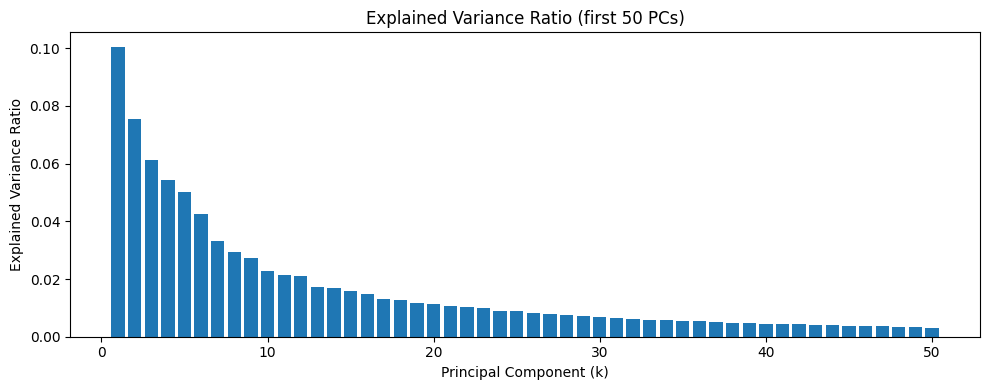

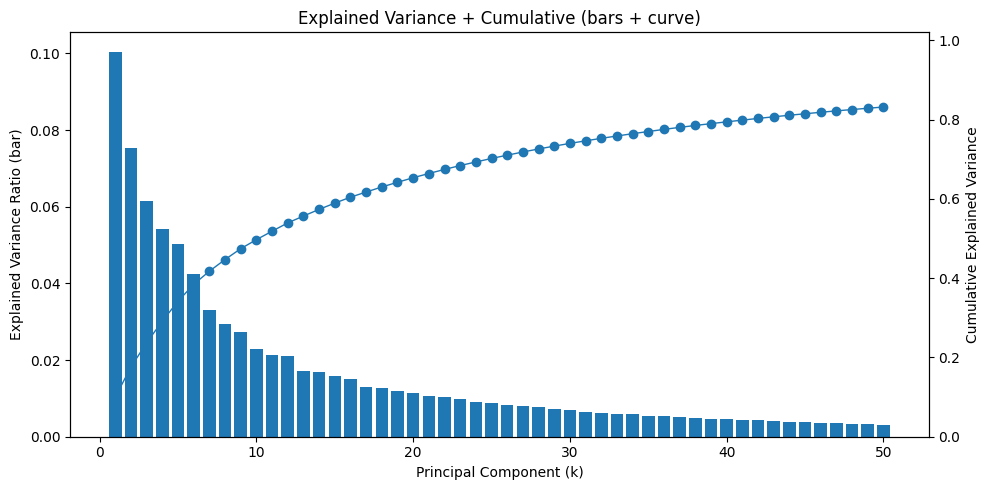

In [3]:

#PCA -- compute first K PCs (how many total?)
K = min(50, X_centered.shape[1])
pca = PCA(n_components=K, svd_solver='randomized', random_state=42)
X_pca = pca.fit_transform(X_centered)
explained_ratio = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_ratio)

#Bar-plot of variances explained by the PCs
plt.figure(figsize=(10,4))
plt.bar(np.arange(1, len(explained_ratio)+1), explained_ratio)
plt.xlabel("Principal Component (k)")
plt.ylabel("Explained Variance Ratio")
plt.title(f"Explained Variance Ratio (first {len(explained_ratio)} PCs)")
plt.tight_layout()
plt.show()

#cumulative curve
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.bar(np.arange(1, len(explained_ratio)+1), explained_ratio)
ax.set_xlabel("Principal Component (k)")
ax.set_ylabel("Explained Variance Ratio (bar)")
ax2 = ax.twinx()
ax2.plot(np.arange(1, len(cum_explained)+1), cum_explained, marker='o', linewidth=1)
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_ylim(0, 1.02)
plt.title("Explained Variance + Cumulative (bars + curve)")
plt.tight_layout()
plt.show()


Cummulative variance captured, helpful in understanding data distribution. Since original number of features very large (784), we only consider first 50 (can be changed according to dataset) which gives around 80% capture of variance

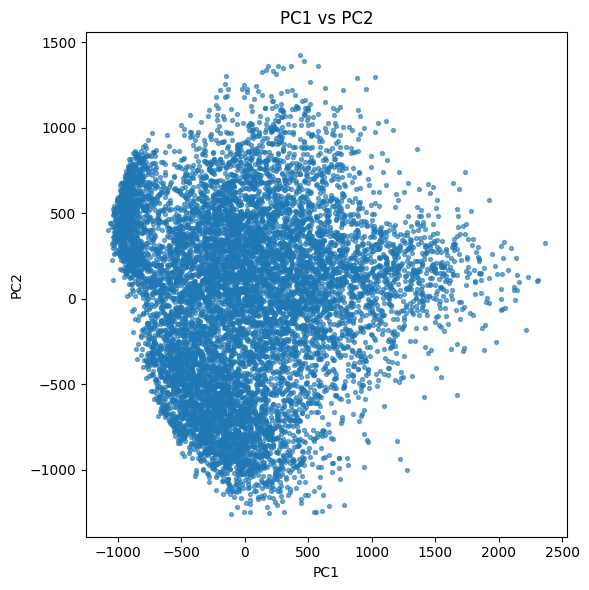

In [4]:

#Scatter plot PC1 vs PC2
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=8, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")
plt.tight_layout()
plt.show()


Variance Explained: The axes of the plot are the principal components (e.g., PC1 on the x-axis and PC2 on the y-axis). The first principal component (PC1) captures the largest possible amount of variance in the original data, and the second (PC2) captures the next largest, and so on. The relative spread of data along each axis indicates how much variation that component explains

c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


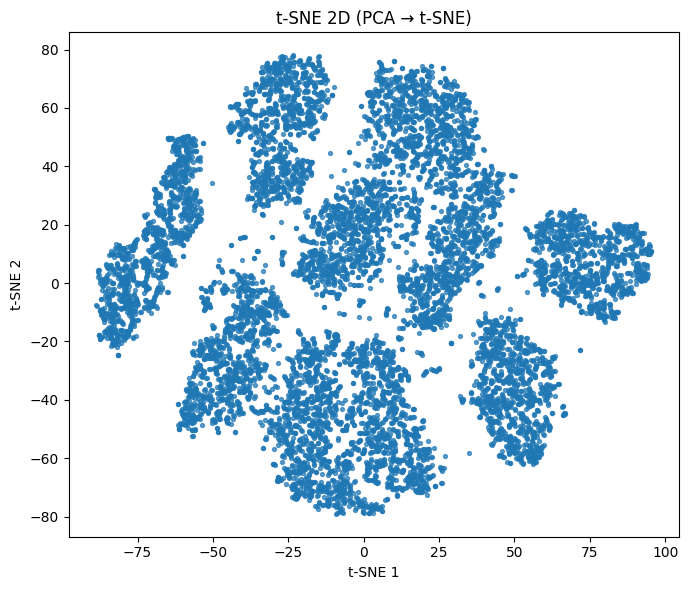

In [5]:
#tsne from PCA
pca_pre = PCA(
    n_components=min(30, K),
    svd_solver='randomized',
    random_state=42
)
X_pca_pre = pca_pre.fit_transform(X_centered)

tsne = TSNE(
    n_components=2,
    init='pca',
    perplexity=30,
    n_iter=1000,
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca_pre)

plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=8, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D (PCA → t-SNE)")
plt.tight_layout()
plt.show()



t-SNE is implemented through PCA here, can be applied independently

Subset shape: (500, 784)


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


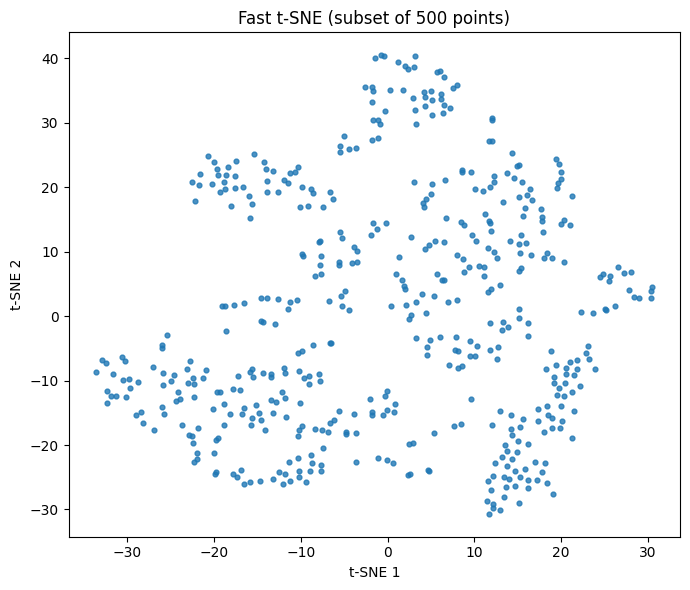

In [6]:
subset_idx = np.random.choice(X_centered.shape[0], 500, replace=False)
X_sub = X_centered[subset_idx]

print("Subset shape:", X_sub.shape)

# ----- STEP 2: PCA pre-reduction (VERY important for speed) -----
pca = PCA(n_components=30, svd_solver='randomized', random_state=42)
X_pca_sub = pca.fit_transform(X_sub)

# ----- STEP 3: Fast t-SNE -----
tsne = TSNE(
    n_components=2,
    init='pca',
    perplexity=20,   # lower perplexity = faster
    n_iter=700,      # fewer iterations = faster but still good quality
    learning_rate="auto",
    random_state=42
)

X_tsne = tsne.fit_transform(X_pca_sub)

# ----- STEP 4: Display plot -----
plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=12, alpha=0.8)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Fast t-SNE (subset of 500 points)")
plt.tight_layout()
plt.show()


Fewer samples compute faster but may not give the complete visual representation, need to find a tradeoff between number of samples(higher computation and time) and visual completeness 